<a href="https://colab.research.google.com/github/epic-coder97/Data-602/blob/main/Homework_%7C_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 5 Homework Data 602
*Nikita Dharmadhikari*


---
Step 1: 
- Import key libraries.
- Use ‘matplotlib.rcParams.update({'font.size': 12})’.
- Use the Boston dataset from sklearn.datasets.
- Load the LinearRegression and Ridge libraries

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.model_selection import train_test_split

Step 2 
- Load the dataset
- Use ‘Price’ as the target and drop ‘Price’ from the ‘newX’ variable. Check if ‘newX’ is 
properly coded.
- Split the dataset into train and test (30%).

In [5]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
newX=boston_df.drop('Price',axis=1)
print(newX[0:3]) # check
newY=boston_df['Price']

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [9]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))


152 152


LinearRegression()

Step 3:
- Use ‘lr’ as the ‘LinearRegression()’ and ‘rr’ as the ‘Ridge()’ models. Set alpha at 0.01 
and alpha at 100 for the Ridge model.
- Fit the train models with ‘lr’ and ‘rr’.
- Compute the scores for the ‘lr’ and ‘rr’ models.

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) # comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print( "linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576851
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123908
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921935


Step 4:
- Compare with the test dataset. 
-I s there any difference between the Ridge models with a lower and a higher alpha?
- Plot the ‘Coefficient Magnitude’ as y and the ‘Coefficient Index’ as X on a graph. Show 
the results for alpha = 0.01 and alpha = 100, together with the Linear Regression model 
coefficients.

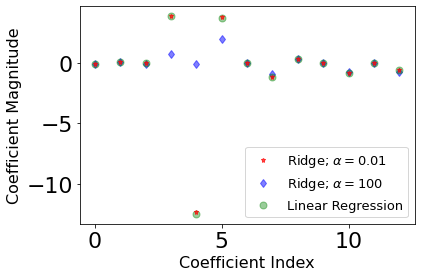

In [15]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Higher the alpha value more restriction on the coefficient.